In [ ]:
#leer el archivo csv

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Proyecto Detección de Fraude/Data2.csv'

df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Time,LimiteCredito,...,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid),Dia_Semana_Domingo,Dia_Semana_Jueves,Dia_Semana_Lunes,Dia_Semana_Martes,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes
0,11473,0,35563,72510,44317,727,1991,1,0.905811,33900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,13029,0,35563,72510,44317,727,1991,1,-0.445224,33900,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5500,0,35563,72510,44317,727,1991,2,-1.142108,33900,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1167,0,35563,72510,44317,727,1991,2,-0.326885,33900,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,995,0,35563,72510,44317,727,1991,3,1.014288,33900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
# Cargar datos
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Aplicar SMOTE para sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_sm, y_train_sm)
y_pred = logreg.predict(X_test)


In [ ]:
# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test)

In [ ]:
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[437263 131518]
 [   326    394]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    568781
           1       0.00      0.55      0.01       720

    accuracy                           0.77    569501
   macro avg       0.50      0.66      0.44    569501
weighted avg       1.00      0.77      0.87    569501



In [ ]:
# Identificando el procentual de error

from sklearn.metrics import mean_squared_error
from sklearn import metrics

error = mean_squared_error(y_test, y_pred)
print("Error porcentual : %f" % (error*100))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

Error porcentual : 23.150793
Exactitud: 0.7684920658611661


In [ ]:
#poner a prueba el modelo clf
DatosPrueba = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto Detección de Fraude/DatosVerificacion.csv')

In [ ]:
XPrueba = DatosPrueba.drop('Is_Fraud', axis=1)
yPrueba = DatosPrueba['Is_Fraud']


In [ ]:
Prediccion = logreg.predict(XPrueba)

In [ ]:
#El conjunto de datos para prueba tiene 10 transacciones, 5 fraudulentas y 5 que no lo son, DatosPrueba =[1,1,1,1,1,0,0,0,0,,0]
Prediccion

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

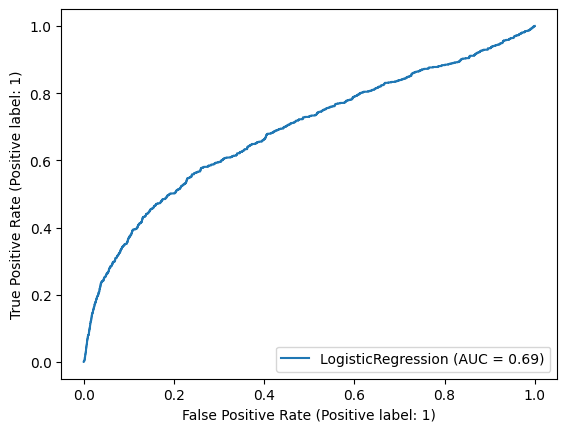

In [ ]:
# graficamente como clasisfica el modelo

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.show()
